
# Proyecto Mecánica de Fluidos: Analisis de flotación y estabilidad de un bongo pescador

## Concepto de Bongo (Motivación)

El Bongo es una embarcación que se ha utilizado por los pescadores artesanales chilenos desde los comienzos de la existencia de este rubro. En un comienzo era de menor tamaño que ahora, su construcción era en madera y su impulsión mediante remo. Actualmente su fabricación está industrializada, existen distintos tamaños y están fabricados con distintos materiales, entre los que destacan la madera y la fibra de vidrio.

Como pueden ver el Bongo tiene una connotación histórica de gran relevancia, ya que permitió el desarrollo de la pesca hace mucho años, y hasta el día de hoy existen muchos pescadores a lo largo del litoral nacional que siguen utilizando como herramienta principal de trabajo.

A continuación se muestran imágenes y modelos del bongo.

![](https://drive.google.com/uc?export=view&id=1mlJ_uTjjZsmjMNfn9lobh8Lo-2kBdYRV)

<center>Figura 1: Imagen de Bongos en caleta chilena antigua.</center>

![](https://drive.google.com/uc?export=view&id=1WFVRsfzrpGL6ijTDh0fKbaQKtD0Q-Ibj)

<center>Figura 2: Esquema del casco de un Bongo pesquero. (Chavez, 2012)</center>

![](https://drive.google.com/uc?export=view&id=1lGVveni1e6RdC9reUfwIzElc1Ft9Uvho)

<center>Figura 3: Vista transversal del casco. (Chavez, 2012)</center>

## Introducción a conceptos náuticos

Existe una multiplicidad de conceptos naúticos pues es toda una área de la ingeniería, pero para el analisis de flotabilidad y estabilidad que se realizará solo es necesario conocer los siguientes 5:

- Eslora: Es la longitud del barco.
- Manga: Es la anchura del barco.
- Puntal: Es la altura del barco.
- Linea de flotación: Es la altura a la cual el barco se hunde en el fluido.
- Escora: Ángulo de inclinación del barco en relación al eje de la eslora.

## Teoría de flotabilidad y estabilidad

### Definiciones importantes

- Masa Específica: Masa por unidad de volumen de un cuerpo (del fluido = $\rho_{fl}$; de la embarcación = $\rho_{b}$).
- Volumen de Carena: Volumen del fluido desplazado ($\forall_{c}$).
- Peso: Masa de la embarcación por aceleración de gravedad (W).
- Fuerza de Empuje: Fuerza opuesta a la del peso, su módulo es el producto entre la masa específica del fluido y el volumen de carena (FE).
- Centro de Gravedad: Punto de aplicación del peso (fuerzas másicas) (G).
- Centro de Carena: Punto de aplicación del empuje, o de las fuerzas boyantes (B).
- Metacentro: Punto de intersección de la proyección del centro de carena con el eje del centro de gravedad (M).
- Brazo de Adrizamiento: distancia entre las líneas de acción de las fuerzas boyantes y másicas (GZ).
- Momento de Inercia: La resistencia que un cuerpo en rotación opone al cambio de su velocidad de giro ($I_{0}$).
- Distancia del Centro de carena al Centro de gravedad (BG).
- Distancia del Centro de gravedad al Metacentro (GM).


### Ecuaciones fundamentales

- Equilibrio de fuerzas (flotación): $FE - W = 0 \rightarrow \forall_{c} \cdot \rho_{fl} = \forall_{b} \cdot \rho_{b}$
- Ecuación de estabilidad: $GM = \frac{I_{0}}{\forall_{c}} - BG $
- Brazo de adrizamiento en función de la escora: $GZ = GM \cdot sen(\theta)$

### Explicación del análisis

En analisis utilizado para el desarrollo de la herramienta interactiva es el siguiente:

Primero se define una geometría para el bongo, en donde en nuestro caso se simplifica a un prisma trapezoidal. Luego, se reciben los parámetros de masa especifica del bongo, masa especifica del fluido, manga, eslora y puntal (además de un parámetro denominado "razon_manga_base" que determina la fracción de la manga que mide la base de la embarcación).

Utilizando las masas específicas y las dimensiones de la embarcación (calculando el volumen de esta) en la ecuación de equilibrio de fuerzas se obtiene el volumen de carena. Con la geometría del bongo es posible determinar una ecuación del volumen de carena en función de la altura de flotación. Finalmente, igualando los volumenes de carena, se obtiene la altura de flotación.

Con la altura de flotación es posible determinar la manga en aquella altura y junto con ello el momento de inercia del plano de flotación (que se sabe que es un rectángulo). Junto con ello también se sabe la geometría del volumen de carena, por lo que se puede obtener el centro de carena (el centro de gravedad ya puede conocerse con la geometría inicial). Con todos estos datos utilizados en la ecuación de estabilidad, puede obtenerse el metacentro.

Finalmente, con todos los datos obtenidos, reemplazando en la tercera ecuación de la sección anterior, puede obtenerse el brazo de adrizamiento para pequeños ángulos de escora (<15°).

Todos los valores aquí descritos se retornan en la herramienta interactiva, si desea ver las formulas desarrolladas para esta geometría en particular puede observar la sección "Fórmulas" del código desarrollado.

## Herramienta interactiva

A continuación tiene lugar la herramienta interactiva, para la cual se simplifica la geometría del bongo a un prisma trapezoidal, con el fin de facilitar el entendimiento.

In [24]:
%matplotlib notebook
import math
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import numpy as np

La sección inferior ("Parámetros usuario") corresponde a los parámetros que puede editar el usuario para experimentar con el simulador. Todos los parámetros se encuentran en unidades de medida según el Sistema Internacional (kg-m-s). Eslora, manga y puntal corresponden al largo de la embarcación, ancho a la altura de cubierta y altura de la embarcación respectivamente (ejes Y, X, Z respectivamente). razon_manga_base determina la fracción de la manga que mide la base de la embarcación.

Una vez seleccionados los valores deseados, ejecute preferentemente todas las celdas del cuaderno para ver toda la información actualizada.

In [25]:
### Parámetros usuario ###

# Valores para bongo estándar de fibra de vidrio:
# masa_especifica_fluido = 1000
# masa_especifica_barco = 310
# eslora = 8.150
# manga = 1.68
# puntal = 0.78
# razon_manga_base = 0.85

masa_especifica_fluido = 1000
masa_especifica_barco = 310
eslora = 8.150
manga = 1.68
puntal = 0.78
razon_manga_base = 0.85

In [26]:
### Parámetros programa ###

base = manga * razon_manga_base
densidad = masa_especifica_barco / masa_especifica_fluido

In [27]:
### Fórmulas ###

volumen_barco = ((base + manga) / 2) * puntal * eslora

if densidad <= 1:
    volumen_de_carena = volumen_barco * densidad
    manga_altura_flotacion = math.sqrt(base**2 + (manga - base)*(manga + base)*densidad)
else:
    volumen_de_carena = volumen_barco
    manga_altura_flotacion = math.sqrt(base**2 + (manga - base)*(manga + base)*densidad)

if razon_manga_base != 1:
    altura_flotacion = ((manga_altura_flotacion - base) * puntal) / (manga - base)
else:
    altura_flotacion = puntal * densidad

inercia_plano_flotacion = (manga_altura_flotacion**3 * eslora) / 12

if densidad > 1:
    manga_altura_flotacion = manga

centro_de_gravedad = (puntal * (2 * manga + base)) / (3 * (manga + base))

if densidad <= 1:
    centro_de_carena = (altura_flotacion * (2 * manga_altura_flotacion + base)) / (3 * (manga_altura_flotacion + base))
else:
    centro_de_carena = centro_de_gravedad

BG = centro_de_gravedad - centro_de_carena

GM = (inercia_plano_flotacion / volumen_de_carena) - BG

metacentro = GM + centro_de_gravedad

Aquí se presentan los distintos resultados obtenidos para el barco diseñado. Las alturas de los distintos centros se miden de acuerdo a la distancia a la base del bongo (El origen del sistema e referencia se encuentra en centro del bongo tanto para el eje x como y, mientras que para el eje z se encuentra en la base del barco).

In [28]:
### Resultados ###

print("Volumen barco:", volumen_barco, "m^3")
print("Volumen de carena:", volumen_de_carena, "m^3")
print("Manga altura de flotación:", manga_altura_flotacion, "m")
print("Altura de flotación:", altura_flotacion, "m")
print("Centro de gravedad:", centro_de_gravedad, "m")
print("Centro de carena:", centro_de_carena, "m")
print("Metacentro:", metacentro, "m")

Volumen barco: 9.878777999999999 m^3
Volumen de carena: 3.0624211799999994 m^3
Manga altura de flotación: 1.5106227060388042 m
Altura de flotación: 0.25573694726296564 m
Centro de gravedad: 0.40054054054054067 m
Centro de carena: 0.12906686262357472 m
Metacentro: 0.893570344509446 m


A continuación se presenta el brazo de adrizamiento para pequeños ángulos de escora (inclinación), dado que para ángulos muy grandes el metacentro se corre del eje del centro de gravedad, la fórmula utilizada resulta ser precisa solo para ángulos menores a 15°.

<IPython.core.display.Javascript object>


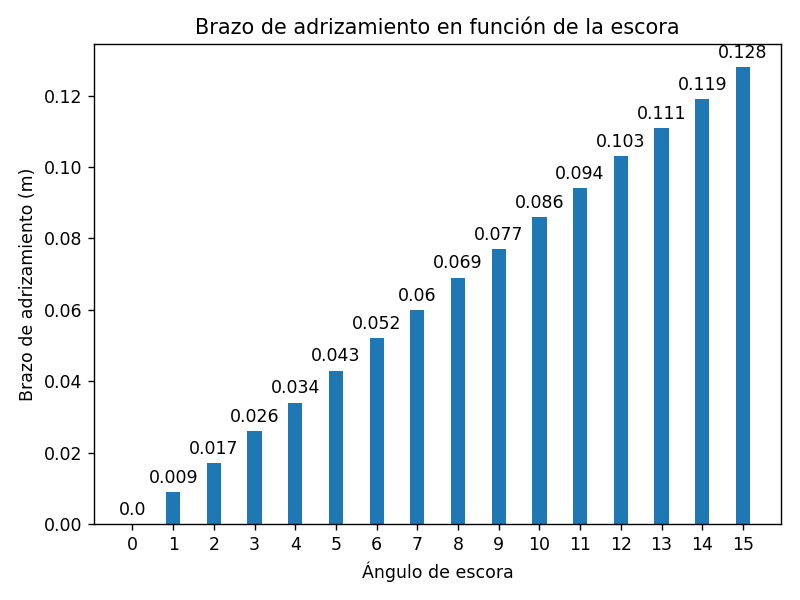

In [29]:
escoras = list(range(16))
brazos_de_adrizamiento = [round((GM * math.sin(math.radians(escora))),3) for escora in escoras]

x = np.arange(len(escoras))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, brazos_de_adrizamiento, width)

ax.set_ylabel("Brazo de adrizamiento (m)")
ax.set_xlabel('Ángulo de escora')
ax.set_title("Brazo de adrizamiento en función de la escora")
ax.set_xticks(x)
ax.set_xticklabels(escoras)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
fig.tight_layout()
plt.show()

En esta última sección puede visualizar e interactuar con el bongo diseñado. El prisma café corresponde al bongo, el plano celeste al agua (línea de flotación), y los puntos azul, rojo y verde corresponden al centro de carena, centro de gravedad y metacentro respectivamente.

<IPython.core.display.Javascript object>


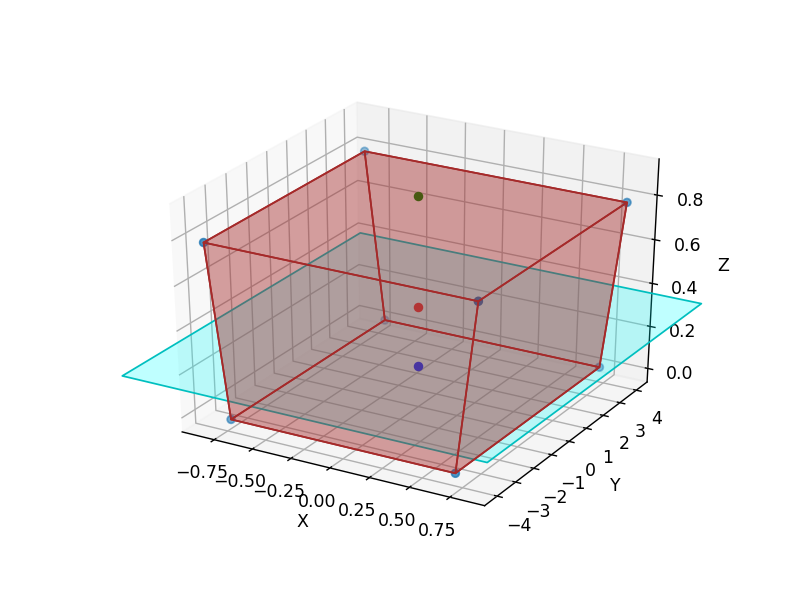

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

v = np.array([[-(base/2), -(eslora/2), 0],
                      [(base/2), -(eslora/2), 0],
                      [(base/2), (eslora/2), 0],
                      [-(base/2), (eslora/2), 0],
                      [-(manga/2), -(eslora/2), puntal],
                      [(manga/2), -(eslora/2), puntal],
                      [(manga/2), (eslora/2), puntal],
                      [-(manga/2), (eslora/2), puntal]])

proporcion_agua = 1.5
v_agua = np.array([[-(manga_altura_flotacion/2)*proporcion_agua, -(eslora/2)*proporcion_agua, altura_flotacion],
                      [(manga_altura_flotacion/2)*proporcion_agua, -(eslora/2)*proporcion_agua, altura_flotacion],
                      [(manga_altura_flotacion/2)*proporcion_agua, (eslora/2)*proporcion_agua, altura_flotacion],
                      [-(manga_altura_flotacion/2)*proporcion_agua, (eslora/2)*proporcion_agua, altura_flotacion]])

cg = np.array([0, 0, centro_de_gravedad])
cc = np.array([0, 0, centro_de_carena])
mc = np.array([0, 0, metacentro])

ax.scatter3D(v[:, 0], v[:, 1], v[:, 2])

verts = [ [v[0],v[1],v[2],v[3]], [v[0],v[1],v[5],v[4]], [v[1],v[2],v[6],v[5]],
        [v[2],v[3],v[7],v[6]], [v[3],v[0],v[4],v[7]], [v[4],v[5],v[6],v[7]] ]

verts_agua = [ [v_agua[0], v_agua[1], v_agua[2], v_agua[3]] ]

ax.add_collection3d(Poly3DCollection(verts, 
 facecolors='brown', linewidths=1, edgecolors='brown', alpha=.25))

ax.add_collection3d(Poly3DCollection(verts_agua, 
 facecolors='cyan', linewidths=1, edgecolors='c', alpha=.25))

ax.scatter(cg[0], cg[1], cg[2], color='red')
ax.scatter(cc[0], cc[1], cc[2], color='blue')
ax.scatter(mc[0], mc[1], mc[2], color='green')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Experimentos recomendados

1) Dele a la masa específica del barco un mayor valor que a la masa específica del fluido. ¿Qué sucede con el barco? ¿Qué pasa con los centros de gravedad y carena?

2) Modifique el valor de la eslora y visualize los resultados. ¿Tiene alguna incidencia sobre la altura de los centros? ¿Tiene alguna incidencia sobre el brazo de adrizamiento?

3) Una de las principales características del bongo es su base ancha y casi plana. Disminuya la razon_manga_base a 0.1 y observe que sucede. ¿Tiene entonces sentido el diseño original del bongo en terminos de estabilidad?
Ahora, con razon_manga_base a 0.1, disminuya la masa_especifica_barco a 50 kg/m^3. ¿Se mantiene un equilibrio estable? ¿Es importante que el barco se hunda lo suficiente?

4) Aumente el puntal a 2 metros y evalue. ¿Se mantiene un equilibrio estable? ¿Qué sucede con el brazo de adrizamiento?